In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [21]:
df['create_date'][0].split('-')  #미호님

['2017', '03', '19  4 35 00 PM']

In [20]:
df.iloc[:,0][0][:7]  # 승희

'2017-03'

In [23]:
df['yearmonth'] =  df['create_date'].apply(lambda x: x[:7])

In [24]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,yearmonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [27]:
# 년도별 일별 거래 횟수
df_yearmonth = df['yearmonth'].value_counts()
df_yearmonth.head()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
Name: yearmonth, dtype: int64

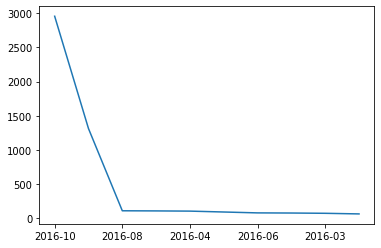

In [30]:
# 년도별 일별 거래횟수  그래프  시계열 속성의 데이터는 정렬 안된 데이터 시각화는 무의미
df_yearmonth.plot()
plt.show()

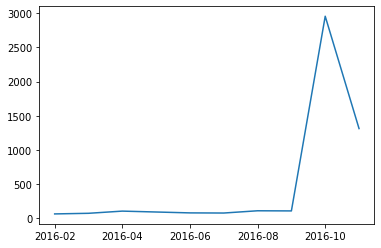

In [34]:
df_yearmonth.sort_index(ascending=True).plot()
plt.show()

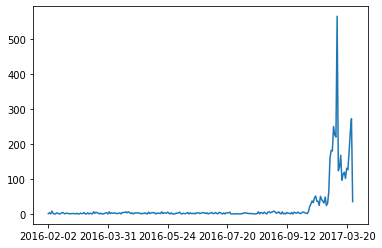

In [39]:
df_yearmonthday =  df['create_date'].apply(lambda x : x[:10]).value_counts()
df_yearmonthday.sort_index(ascending = True).plot()
plt.show()

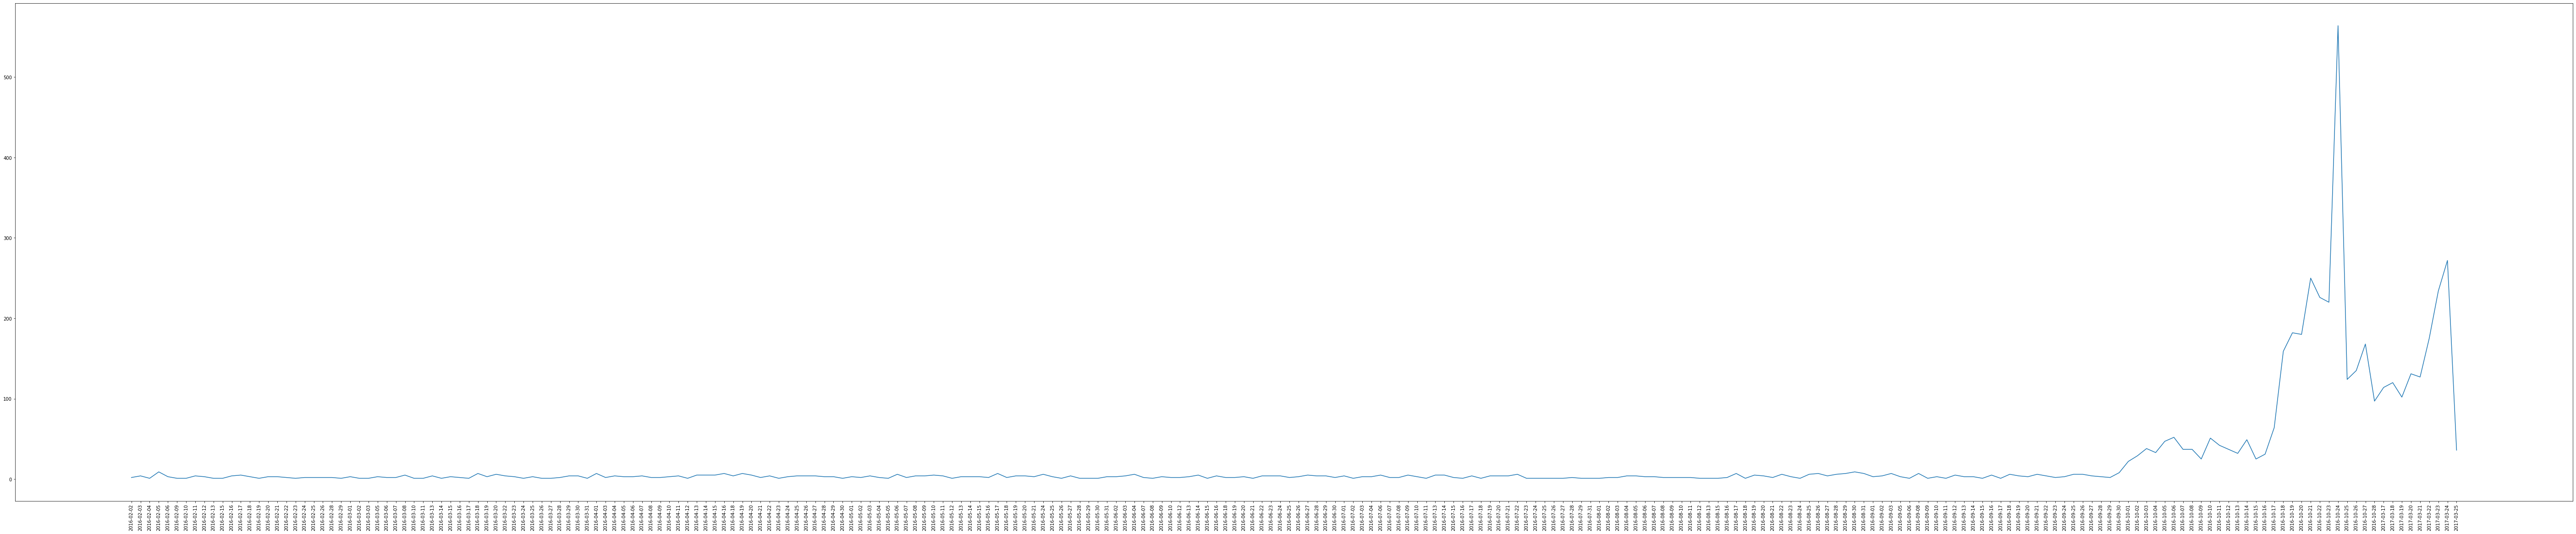

In [69]:
df_yearmonthday = df_yearmonthday.sort_index()

plt.figure(figsize=(100,20))
plt.plot(df_yearmonthday.index, df_yearmonthday.values)
plt.xticks(rotation=90)
plt.show()


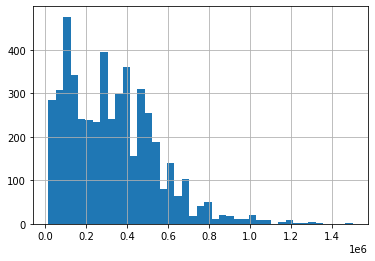

In [46]:
# 가격 피처 탐색
df['price'].hist(bins="auto")
plt.show()

In [45]:
df['price'].head()


200000.0

In [67]:
# 모델 별 가격
df_model_price = df.groupby('phone_model')['price'].mean()
df_model_price

phone_model
g pro2 32gb             90142.857143
g3 cat.6 32gb          110325.777778
g4 32gb                154842.105263
galaxy a7 2016 16gb    283636.363636
galaxy a8 2016 32gb    211125.000000
                           ...      
vega secret up 16gb    134565.217391
wine smart jazz 4gb     91194.531250
xperia z3 16gb         230000.000000
xperia z3 32gb         193571.428571
y6 8gb                 111857.142857
Name: price, Length: 64, dtype: float64

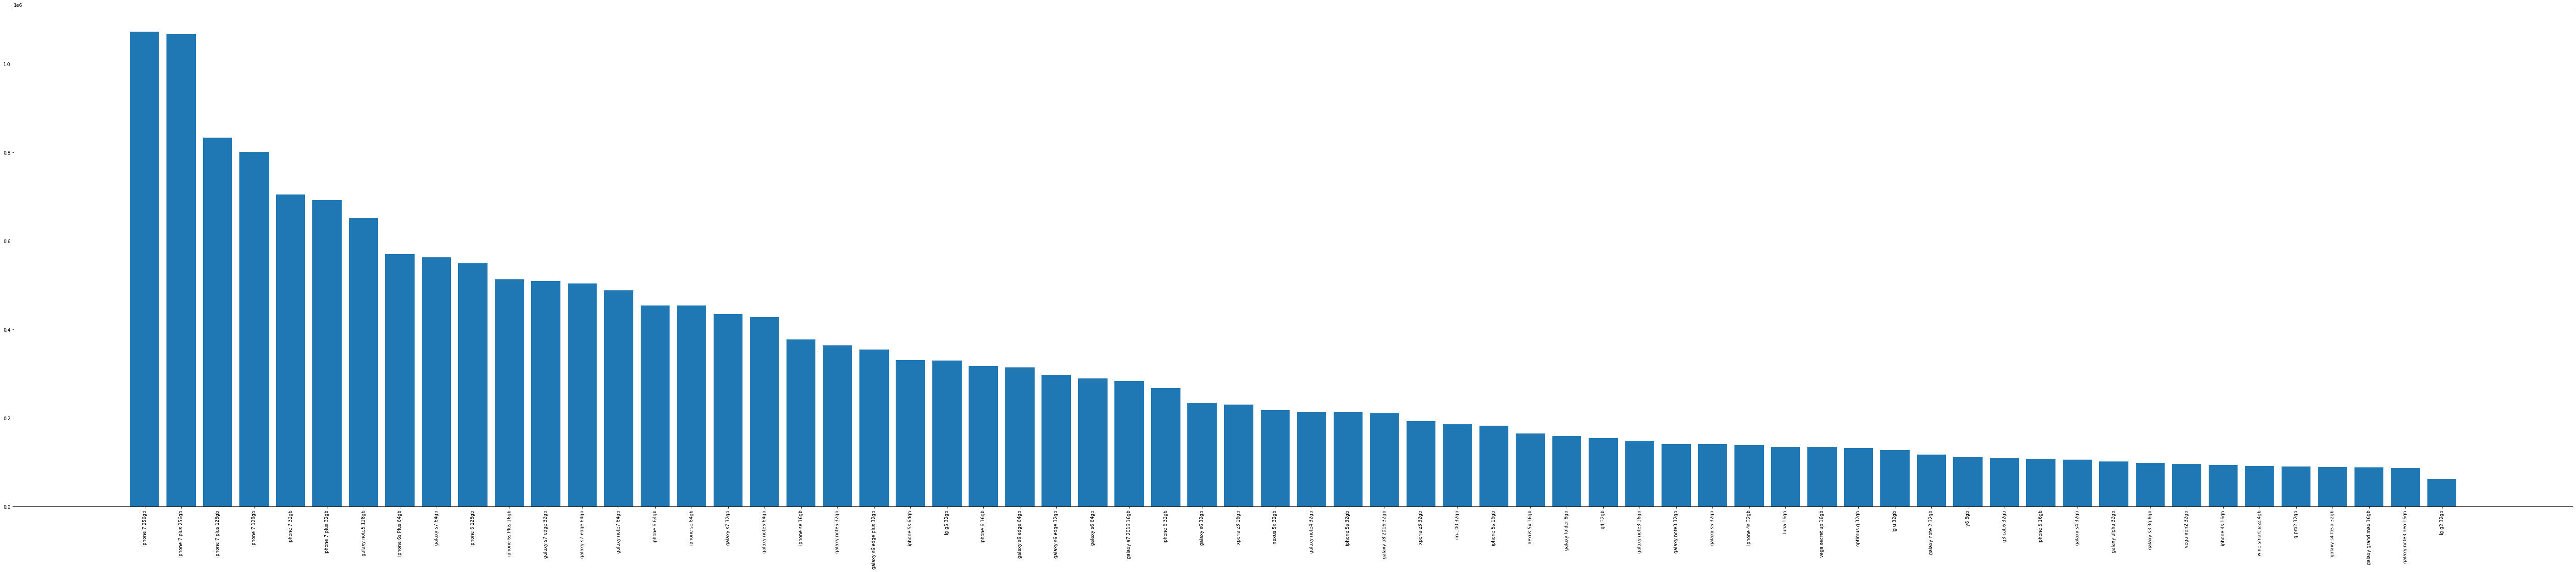

In [66]:
plt.figure(figsize=(100,20))
df_model_price  = df_model_price.sort_values(ascending=False)
plt.bar(df_model_price.index, df_model_price.values)
plt.xticks(rotation=90)
plt.show()

In [65]:
# 출고가.. 위와같이 시가기화


In [ ]:
# 모든 피처들의 상관관계
# 모델별 거래 데이터 -- box plot
# 가격 예측.......  Random Forest를 이용해서 가격 예측...
# 다른걸 생각해 오기....  그걸 수업시간에 같이 적용해 보기.
# 중요피처는 뭐가 있을까?